# EDA

In [34]:
import numpy as np
import pandas as pd
from haversine import haversine, Unit
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv("/workspaces/Emiliano0041-IntroML/data/raw/AB_NYC_2019.csv")
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


### Conocecmos el data set con el que vamos a trabajar
- Para eso nos interesan algunas cosas como el tamaño en filas y columnas y las columnas que tenemos.

In [36]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

###

- Con df.drop verificamos que no haya ningun alojamiento duplicado.

In [37]:
df.drop("id", axis=1).duplicated().sum()

np.int64(0)

- Con esto nos damos cuenta que hay casi 11,5 mil hostes que administran mas de un alojamiento. Dato que quizas nos pueda servir mas adelante.

In [38]:
df.duplicated("host_id").sum()

np.int64(11438)

- En este punto lo que hago es eliminar las columnas que no veo relevantes para el estudio, como lo son el nombre del alojamiento y el nombre del host.


In [39]:
df.drop(["name", "host_name"], axis=1, inplace=True)


- Lo que hago a continuacion es eliminar todos los alojamientos que tengan como precio = 0, ya que pueden ser errores o outliers que me pueden entorpecer el analisis. 

In [40]:
df = df[df["price"] > 0]
df

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


- Ahora cree una nueva columna, determinando la latitud y longitud del Time square, en la que podemos apreciar la distancia de cada alojamiento a esta atraccion turistica, una de las mas famosas de Nueva York.

- Para esto importe haversine, funcion que nos permite calcular distancias geograficas si tenemos latitud y longitud, hacia un punto de interes.

In [49]:
time_square = (40.7580, -73.9855)
df["distance_time_square"] = df.apply(lambda row : 
                                      haversine((row["latitude"], row["longitude"]), 
                                                time_square, unit=Unit.KILOMETERS), axis=1)
df

/tmp/ipykernel_548/1799952602.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["distance_time_square"] = df.apply(lambda row :


,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,distance_time_square,type_room
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,12.337915,2
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0.508366,1
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,6.757250,2
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,8.387046,1
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,5.701504,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,9.330768,2
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,7.644604,2
48892,36485431,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,7.030997,1
48893,36485609,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,0.476485,3


- Ahora con .describe() podemos conocer a fondo alguna de las medidas estadisticas que nos serviran para sacar algunas conclusiones. Dude si redondear algunos resultados y convertir los numeros a enteros para no dejarlos en notacion cientifica, pero quiero ser preciso en mis estadisticas, por eso lo dejo asi.

In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48884.0,1.901679e+07,1.098432e+07,2539.000000,9.470548e+06,1.967574e+07,2.915297e+07,3.648724e+07
host_id,48884.0,6.762203e+07,7.861666e+07,2438.000000,7.817310e+06,3.079257e+07,1.074344e+08,2.743213e+08
latitude,48884.0,4.072895e+01,5.453177e-02,40.499790,4.069010e+01,4.072308e+01,4.076312e+01,4.091306e+01
longitude,48884.0,-7.395218e+01,4.615874e-02,-74.244420,-7.398308e+01,-7.395569e+01,-7.393629e+01,-7.371299e+01
price,48884.0,1.527551e+02,2.401703e+02,10.000000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48884.0,7.029887e+00,2.051222e+01,1.000000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48884.0,2.327199e+01,4.455133e+01,0.000000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38833.0,1.373128e+00,1.680391e+00,0.010000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48884.0,7.144628e+00,3.295619e+01,1.000000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48884.0,1.127795e+02,1.316273e+02,0.000000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


- Ahora con .unique(), verificamos cuantos tipos de alojamiento tenemos, para luego convertirlos en datos numericos.

- Luego, con .value_counts() tambien podemos verificar que no hayan errores de tipeo, por ejemplo, en ninguna de las filas.

In [47]:
df["room_type"].unique()
df["room_type"].value_counts()

room_type
Entire home/apt    25407
Private room       22319
Shared room         1158
Name: count, dtype: int64

- Aqui lo que hago es crear una nueva columna "type_room" en donde le otorgue un valor numerico al tipo de alojamiento. En el cual:

--- Entire home/apt = 1

--- Private room = 2

--- Shared room = 3

- Con esto ya podemos usar el tipo de alojamiento en analisis estadisticos numericos

In [46]:
df["type_room"] = df["room_type"].map({
    "Entire home/apt" : 1,
    "Private room" : 2,
    "Shared room" : 3
})
df

/tmp/ipykernel_548/604329670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["type_room"] = df["room_type"].map({


,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,distance_time_square,type_room
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,12.337915,2
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0.508366,1
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,6.757250,2
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,8.387046,1
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,5.701504,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,9.330768,2
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,7.644604,2
48892,36485431,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,7.030997,1
48893,36485609,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,0.476485,3


<Axes: >

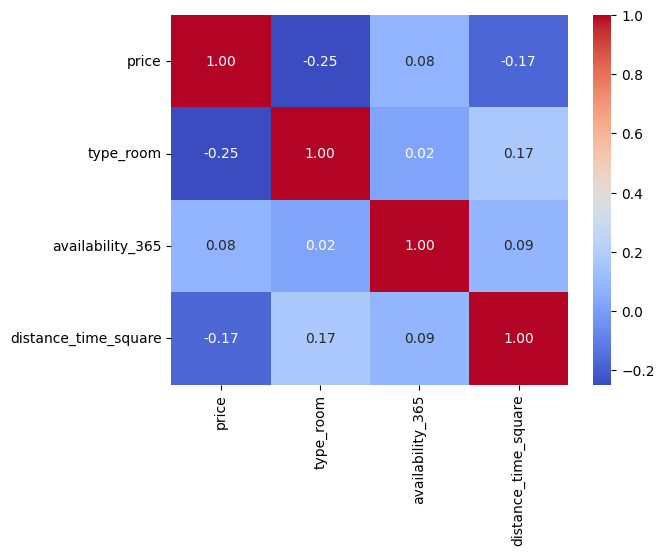

In [45]:
sns.heatmap(df[["price", "type_room", "availability_365", "distance_time_square"]].corr(),
            annot=True, fmt=".2f", cmap="coolwarm")

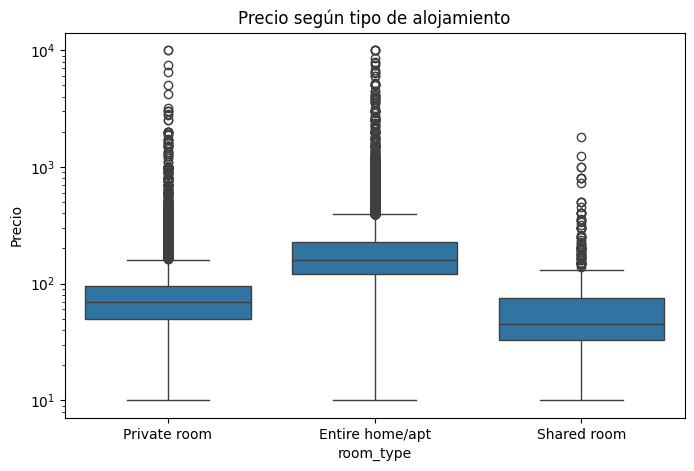

In [65]:
plt.figure(figsize=(8, 5))
sns.boxplot(df, x="room_type", y="price")
plt.title("Precio según tipo de alojamiento")
plt.ylabel("Precio")
plt.yscale("log")
plt.show()

Text(0, 0.5, 'Distancia al Time Square (km)')

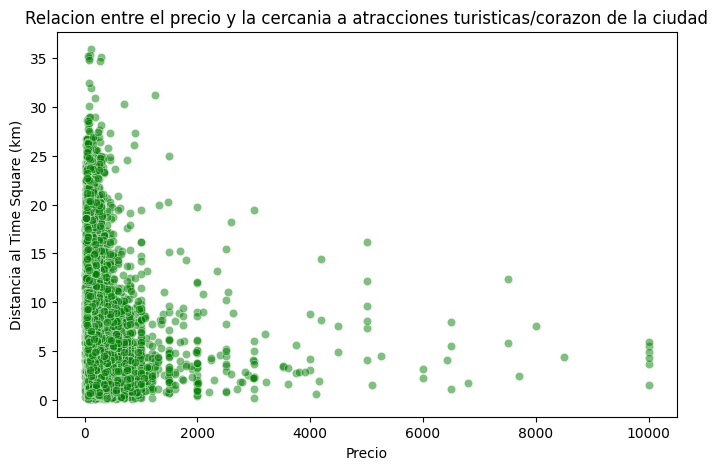

In [62]:
plt.figure(figsize=(8,5))
sns.scatterplot(df, x="price", y="distance_time_square", color="g", alpha=0.5)
plt.title("Relacion entre el precio y la cercania a atracciones turisticas/corazon de la ciudad")
plt.xlabel("Precio")
plt.ylabel("Distancia al Time Square (km)")


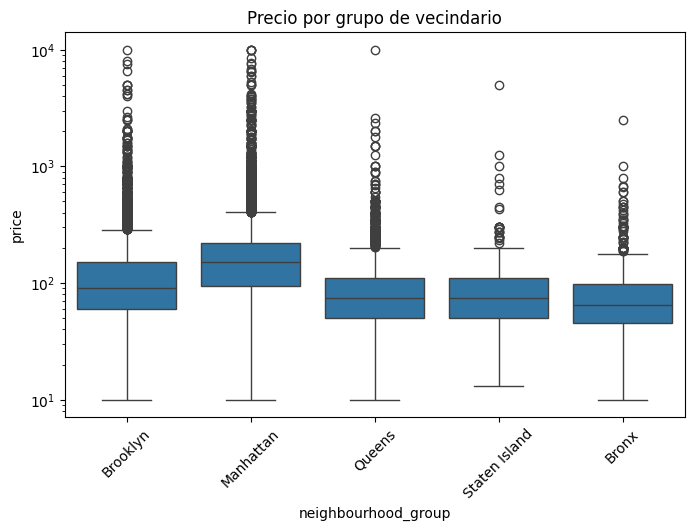

In [66]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="neighbourhood_group", y="price")
plt.title("Precio por grupo de vecindario")
plt.yscale("log")
plt.xticks(rotation=45)
plt.show()
